In [60]:
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
df_cur = pd.read_excel("witn_new_rat_ag_num_cat_catnum.xlsx")
df_cur.head(10)

,Unnamed: 0,_id,success,_name,name_comp,_ro_type,identifier,identifier_type,additional_identifier_type,isin,...,id_uuid,json_additional,meta,new_rating,agency,rating_numeric,rating_numeric_int,rating_category,rating_category_,rating_numeric_cat
0,0,1,True,Общество с ограниченной ответственностью Холди...,NaN,BNFC - нефинансовая компания,7801293231,ИНН,NaN,NaN,...,a0f6e8c8-a2e7-4740-97ac-fff125c0821a,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB-,Expert RA,10,10,BBB,BBB,4
1,1,2,True,Общество с ограниченной ответственностью ПЕТЕР...,NaN,BNFC - нефинансовая компания,7801423924,ИНН,NaN,NaN,...,c317bce9-7d26-456a-be8c-6f2cda45042d,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruB+,Expert RA,14,14,B,B,6
2,2,3,True,Общество с ограниченной ответственностью ХРОМО...,NaN,BNFC - нефинансовая компания,5249111131,ИНН,NaN,NaN,...,9643b9cf-295f-4fc9-82d4-30f3b791101f,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBB,Expert RA,12,12,BB,BB,5
3,3,5,True,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""КИНГ...",NaN,BNFC - нефинансовая компания,7816562511,ИНН,NaN,NaN,...,537699a6-7c72-46a4-b2bd-b12b7157fe3e,NaN,"{'Comment': 'Success', 'added key to': 'level_...",BBB-(RU),AKRA,10,10,BBB,BBB,4
4,4,1634,True,"Облигации, АО «АЛЬФА-БАНК», Старший необеспече...",АКЦИОНЕРНОЕ ОБЩЕСТВО «АЛЬФА-БАНК»,TBND - облигационный займ,7728168971,ИНН,NaN,RU000A107A69,...,d87bb094-ca4b-42f5-967a-be180b943d96,NaN,"{'Comment': 'Success', 'added key to': 'level_...",AA+(RU),AKRA,2,2,AA,AA,2
5,5,1737,True,"Облигации, АО «АЛЬФА-БАНК», Старший необеспече...",NaN,TBND - облигационный займ,7728168971,ИНН,NaN,RU000A0JX5W4,...,3a53d6f6-a7e3-442c-a9e3-4f97b72a74a5,NaN,"{'Comment': 'Success', 'added key to': 'level_...",AA+(RU),AKRA,2,2,AA,AA,2
6,6,1738,True,"Облигации, АО «АЛЬФА-БАНК», Старший необеспече...",NaN,TBND - облигационный займ,7728168971,ИНН,NaN,RU000A0JX5W4,...,2f5c1a11-2c93-46f7-b050-a5e93fb793d8,NaN,"{'Comment': 'Success', 'added key to': 'level_...",AA(RU),AKRA,3,3,AA,AA,2
7,7,1739,True,"Облигации, АО «АЛЬФА-БАНК», Старший необеспече...",NaN,TBND - облигационный займ,7728168971,ИНН,NaN,RU000A0JX5W4,...,d625b597-2646-449f-9ddf-f0f28840d22e,NaN,"{'Comment': 'Success', 'added key to': 'level_...",AA(RU),AKRA,3,3,AA,AA,2
8,8,1803,True,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""РАЗРЕЗ КОЛЫВАНСКИЙ""",NaN,BNFC - нефинансовая компания,5406192366,ИНН,NaN,NaN,...,0c46e084-c183-4536-97aa-9fbab07ecd78,NaN,"{'Comment': 'Success', 'added key to': 'level_...",A(RU),AKRA,6,6,A,A,3
9,9,7,True,"Публичное акционерное общество ""АВТОКОМБИНАТ №...",NaN,CO - прочий вид организации,7728013537,ИНН,NaN,NaN,...,2491b9ba-128c-419e-854b-46a03a76d10a,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruB,Expert RA,15,15,B,B,6


In [10]:
df_cur = df_cur.loc[~df_cur["_ro_type"].str.startswith("T", na=False)]
ident = df_cur["identifier"].unique()
series_length = {}
for inn in ident:
    if inn not in series_length:
        series_length[inn] = {}
    for agency in df_cur["agency"].unique():
        if agency not in series_length[inn]:
            series_length[inn][agency] = []
        temp_df = df_cur[(df_cur["identifier"] == inn) & (df_cur["agency"] == agency)]
        curr_len = len(temp_df["new_rating"])
        series_length[inn][agency] = curr_len   # there should apply the length of series of each company in cra
df_ser = pd.DataFrame().from_dict(series_length).T.reset_index()
df_ser.rename(columns={"index": "identifier"}, inplace=True)

In [12]:
df_ser

,identifier,Expert RA,AKRA,NCR,NRA
0,7801293231,1,0,0,0
1,7801423924,1,0,0,0
2,5249111131,1,0,0,0
3,7816562511,0,1,0,0
4,5406192366,0,4,0,0
...,...,...,...,...,...
1301,7701899124,1,0,0,0
1302,7707285385,1,0,0,0
1303,7727039934,1,0,0,0
1304,7726696408,1,0,0,0


In [15]:
df_ser[df_ser["Expert RA"] >= 10]

,identifier,Expert RA,AKRA,NCR,NRA
31,5405114781,10,0,1,0
33,8602190258,10,1,0,0
95,7702073683,10,1,0,0
110,7708678325,10,0,0,0
188,7805104870,11,0,0,1
...,...,...,...,...,...
1248,7831000034,10,0,0,6
1253,7831000080,10,0,0,0
1257,2634028786,10,0,0,0
1263,7705522866,12,0,0,0


Выберем для расчета 1 объект и расчитаем для него параметр Херста (отдельно, потом для 10 и для всей выборки (составить общую функцию)


In [30]:
check = df_cur[(df_cur["identifier"] == 5405114781) & (df_cur["agency"] == 'Expert RA')]

In [32]:
check

,Unnamed: 0,_id,success,_name,name_comp,_ro_type,identifier,identifier_type,additional_identifier_type,isin,...,id_uuid,json_additional,meta,new_rating,agency,rating_numeric,rating_numeric_int,rating_category,rating_category_,rating_numeric_cat
91,91,97,True,Акционерное общество Банк Акцепт,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,02479ec2-5d4e-4584-84d3-e244c096b2fd,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
92,92,98,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,9c507f0e-bf08-4f07-9596-622ff99d4185,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
93,93,99,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,5c250ad1-5844-4a08-a896-9e96eecebe46,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
94,94,100,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,329a47e1-d294-4387-802d-eb82a3280024,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
95,95,101,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,1f97c5ce-af6b-4abf-b2ab-fc12daa90672,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
96,96,102,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,eede8f29-9189-4c60-a3b3-6003a1285feb,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
97,97,103,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,496f3053-f4d8-4ba9-9dda-d29590e4131e,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
98,98,104,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,568b065c-6af6-475c-8861-5b9898f6b90f,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4
99,99,105,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,ccea532c-e93c-481c-a672-70f5ba51f5ca,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruA-,Expert RA,7,7,A,A,3
100,100,106,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,28e9ae36-3b94-4437-b2ca-235af51f41ec,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruA,Expert RA,6,6,A,A,3


In [34]:
check["rating_numeric_cat"].mean()

3.8

In [40]:
check["untrated"] = check["rating_numeric_cat"] - check["rating_numeric_cat"].mean()


/var/folders/0w/pg719rr9519435t25t6yf2hm0000gn/T/ipykernel_55186/3436825693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check["untrated"] = check["rating_numeric_cat"] - check["rating_numeric_cat"].mean()


In [42]:
check

,Unnamed: 0,_id,success,_name,name_comp,_ro_type,identifier,identifier_type,additional_identifier_type,isin,...,json_additional,meta,new_rating,agency,rating_numeric,rating_numeric_int,rating_category,rating_category_,rating_numeric_cat,untrated
91,91,97,True,Акционерное общество Банк Акцепт,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
92,92,98,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
93,93,99,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
94,94,100,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
95,95,101,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
96,96,102,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
97,97,103,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
98,98,104,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruBBB+,Expert RA,8,8,BBB,BBB,4,0.2
99,99,105,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruA-,Expert RA,7,7,A,A,3,-0.8
100,100,106,True,Акционерное общество «Банк Акцепт»,NaN,CBNK - кредитная организация,5405114781,ИНН,NaN,NaN,...,NaN,"{'Comment': 'Success', 'added key to': 'level_...",ruA,Expert RA,6,6,A,A,3,-0.8


In [54]:
check = check.sort_values(by="_date", ascending=True)

In [58]:
to_plot_hers = []
curr_step = 0
for val in check["untrated"].values:
    curr_step += val
    to_plot_hers.append(curr_step)

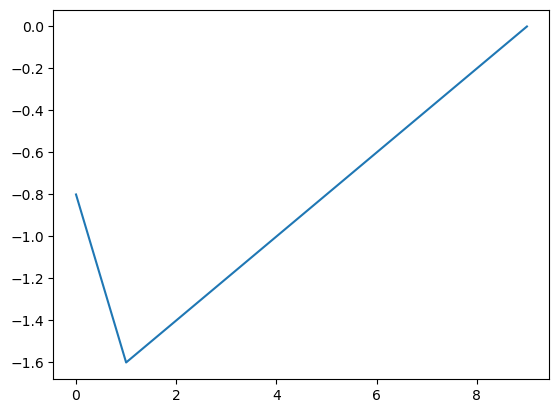

In [62]:
plt.plot(to_plot_hers)

Теперь для всех 75 объектов для Expert RA

In [87]:
full_obj = []
for inn in df_ser[df_ser["Expert RA"] >= 10]["identifier"].values:
    check = df_cur[(df_cur["identifier"] == inn) & (df_cur["agency"] == 'Expert RA')]
    check = check.sort_values(by="_date", ascending=True)
    check["untrated"] = check["rating_numeric_cat"] - check["rating_numeric_cat"].mean()
    full_obj.append(check["untrated"].values)



In [88]:
full_obj

[array([-0.8, -0.8,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.1, -0.1, -0.1, -0.1, -0.1, -1.1, -1.1,  0.9,  0.9,  0.9]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 0.72727273,  0.72727273, -0.27272727, -0.27272727, -0.27272727,
        -0.27272727, -0.27272727, -0.27272727, -0.27272727, -0.27272727,
         0.72727273]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.83333333, -0.83333333, -0.83333333, -0.83333333,  0.16666667,
         0.16666667,  0.16666667,  0.16666667,  0.16666667,  0.16666667,
         1.16666667,  1.16666667]),
 array([-0.2, -0.2, -0.2, -0.2,  0.8,  0.8, -0.2, -0.2, -0.2, -0.2]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.,

In [91]:
to_plot_hers = []
curr_step = 0
for obj in full_obj:
    for step_ in obj:
        curr_step += step_
        to_plot_hers.append(curr_step)

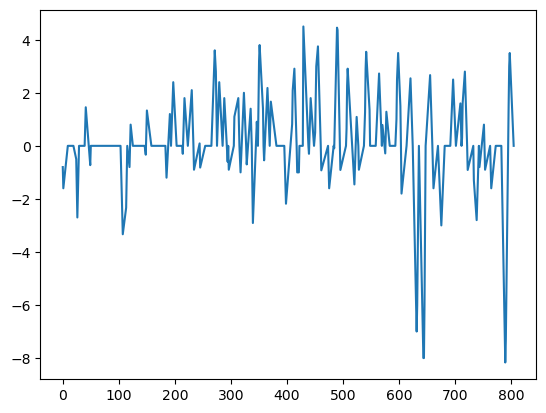

In [93]:
plt.plot(to_plot_hers)

Аналогично можно сделать и для других компанимй (из другой книжки)